## PCA and Text Analysis

This assignment involves processing real e-mails, some of which are scams.

Fair warning: Some of these scam e-mails have offensive content. If you start reading the e-mail text or the token data, you might read something offensive. If that's a problem, feel free to e-mail me, and we can talk about it and discuss how to proceed with alternative tasks.

### Q1.

**Tokens**: The individual words or symbols that create text data like emails. Natural Language Processing is primarily about analyzing the frequency and co-occurrence of tokens.

I aggregated all the emails into a single vector, and removed the punctuation and very common words (e.g. "the"). Run the below code chunk to open it, and use the Counter class to look at the most common words:

In [1]:
#Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
!git clone https://github.com/annieedmonds/pca_assignment.git

Cloning into 'pca_assignment'...
remote: Enumerating objects: 15, done.
remote: Counting objects: 100% (15/15), done.
remote: Compressing objects: 100% (14/14), done.
remote: Total 15 (delta 1), reused 5 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (15/15), 1.94 MiB | 8.23 MiB/s, done.
Resolving deltas: 100% (1/1), done.


In [3]:
import pickle
with open('/content/pca_assignment/data/all_tokens.pickle', 'rb') as file:
    all_tokens = pickle.load(file)

from collections import Counter
token_count = Counter(all_tokens)
token_freq = token_count.most_common()
print(token_freq)

[('new', 1365), ('date', 1202), ('get', 1052), ('please', 1022), ('enron', 927), ('like', 923), ('2002', 869), ('would', 806), ('one', 798), ('message', 795), ('call', 740), ('free', 691), ('software', 680), ('dear', 651), ('know', 644), ('email', 629), ('url:', 625), ('time', 609), ('start', 604), ('linguistics', 598), ('online', 591), ('need', 587), ('wrote:', 585), ('see', 554), ('conference', 553), ('language', 550), ('want', 548), ('empty', 546), ('hourahead', 526), ('list', 523), ('attached', 515), ('hello', 501), ('university', 500), ('2001', 489), ('information', 473), ('vince', 473), ('may', 461), ('good', 449), ('following', 448), ('hour', 446), ('2000', 442), ('business', 442), ('save', 423), ('first', 423), ('click', 423), ('best', 423), ('make', 421), ('com', 413), ('original', 410), ('offer', 405), ('meeting', 403), ('thanks', 397), ('mail', 395), ('use', 389), ('find', 386), ('papers', 383), ('http', 378), ('sent', 375), ('available', 373), ('last', 372), ('update', 363)

Plot a histogram of the occurrences of tokens.

What do you notice about the frequency of occurrence of different tokens? How does it look?

In [4]:
#Create data frame of token frequency
token_freq_df = pd.DataFrame(token_freq, columns = ['Token', 'Frequency'])

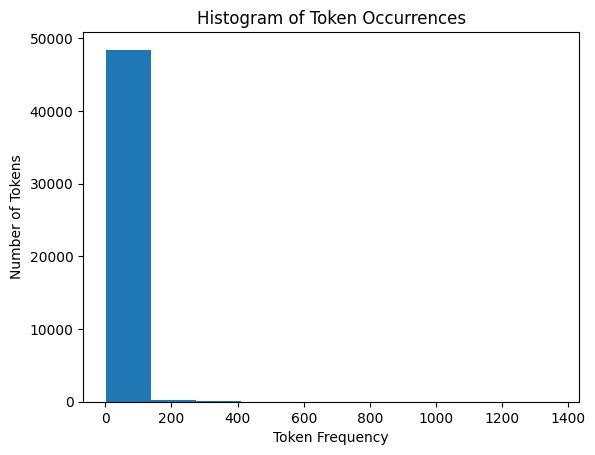

In [5]:
plt.hist(token_freq_df['Frequency'])
plt.xlabel('Token Frequency')
plt.ylabel('Number of Tokens')
plt.title('Histogram of Token Occurrences')
plt.show()

What do you notice about the frequency or occurrence of tokens? How does it look? The bars are clustered to the far left for a frequency of about 0-100. This means that most tokens only occur a few times, and only a few tokens occur very frequently. This means that the data is highly skewed, which is why the bar graph is clustered so far toward a low frequency.

### Q2.

Load `Phishing_clean.parquet`. This is the text from the e-mails broken into the most common 2,711 tokens and one-hot-encoded as features/covariates. So each row is an e-mail, the `Email Type` takes the value 1 if it's a scam and 0 otherwise, and every other column is a word or symbol that occurs in at least 15 e-mails.

1. Perform an 80/20 train-test split of the data.
2. Run a regression of $y$ on the one-hot-encoded emails. What is the $R^2$ on the test set? On the training set?
3. What words have the largest coefficients in absolute value and most strongly influence predictions?

In [13]:
#Load Phishing_clean.parquet
df_phishing = pd.read_parquet('/content/pca_assignment/data/Phishing_clean.parquet')
df_phishing.head()


,Email Type,new,date,get,please,enron,like,2002,would,one,...,ï¿½ï¿½,safety,yap,ypil,maintain,procedures,tip,elizabeth,leadership,italian
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [14]:
#Perform an 80/20 train-test split of the data
from sklearn.model_selection import train_test_split

X = df_phishing.drop(['Email Type'], axis=1)
y = df_phishing['Email Type']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [15]:
#Run a regression of y on the one-hot-enconded emails
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

model = LinearRegression()
model.fit(X_train, y_train)

y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

#Compute the 𝑅2 on the testing/training set
r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)

print("R2 on the training set:", r2_train)
print("R2 on the testing set:", r2_test)


R2 on the training set: 0.7670143724934355
R2 on the testing set: 0.6658718438847919


In [16]:
#What words have the largest coefficients in absolute value and most strongly influence predictions?
coef_df = pd.DataFrame({'Token': X_train.columns, 'Coefficient': model.coef_})
coef_df

#Sort by absolute value
coef_df = coef_df.sort_values(by='Coefficient', key=abs, ascending=False)
coef_df

,Token,Coefficient
835,intervention,-1.259257e+00
740,localized,8.243505e-01
2362,thermal,7.470065e-01
851,crawler,6.961667e-01
1504,background-image:,-6.229094e-01
...,...,...
915,300,-6.938894e-18
2642,301,3.469447e-18
1898,250,0.000000e+00
1818,830,0.000000e+00


Intervention, localized, thermal, crawler, and background-image are the top 5 words with the largest coefficients in absolute value and they most strongly influence predictions.

### Q3.

Take the matrix of one-hot-encoded tokens (the data, less the outcome variable, `Email Type`) and perform a principal components analysis decomposition with two components. Plot the first two principal components in a scatter plot, and hue the points by whether they are a phishing scam or not. Do you notice any patterns?

In [17]:
#Perform a principal components analysis decomposition with two components
from sklearn.decomposition import PCA
pca = PCA(n_components = 2)
X_pca = pca.fit_transform(X_train)

#Create a dataframe
pca_df = pd.DataFrame(data = X_pca, columns = ['PC1', 'PC2'])
pca_df['Email Type'] = y_train.values

<Axes: xlabel='PC1', ylabel='PC2'>

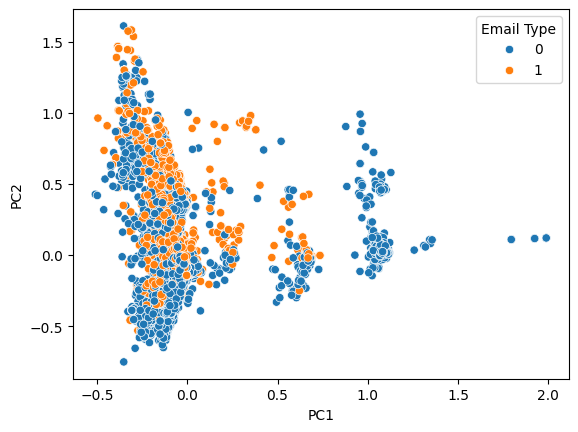

In [18]:
#Plot the first two principal components in the scatterplot, and hue points by whether they are phishing scam or not
sns.scatterplot(data = pca_df, x = 'PC1', y = 'PC2', hue = 'Email Type')

Do you notice any patterns? The phishing scam and non-phishing scam email data points have a lot of overlap, especially in the very dense cluster skewed to the left of the graph. This means that the two principal components do not do a very efficient job of separating phishing and non-phishing emails. However there is a cluster of non-phishing scam emails to the right of the graph, representing legitimate emails that share token patterns.

### Q4.

Run a linear regression of $y$ on the first 2,610 principal components of $X$. What is the $R^2$ on the training and test sets? (I used cross validation to determine that 2,610 was approximately optimal, but not all 2,711 components.)

How does this performance compare to the linear regression?

In [19]:
#Run a linear regression of y on the first 2,610 principal components of X
pca = PCA(n_components = 2610)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

In [20]:
#Fit linear regression on PCA-transformed training set
model = LinearRegression()
model.fit(X_train_pca, y_train)

y_train_pred = model.predict(X_train_pca)
y_test_pred = model.predict(X_test_pca)

#Compute the 𝑅2 on the testing/training set
r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)

#Print R2 on the testing/training set

print("R2 on the training set:", r2_train)
print("R2 on the testing set:", r2_test)

R2 on the training set: 0.7662326827745849
R2 on the testing set: 0.6683390643101164


How does this performance compare?: The R2 values are very close for both the training and testing sets for both performances. There is a tiny difference in the R2 on the testing set, as it is slightly higher after PCA. However, since the R2 values are nearly identical, it indicates that the use of the first 2,610 principal components keeps most of the power of the orignal features.

### Q5.

Explain briefly in your own words what the advantage is in using the principal components to run this high-dimensional regression, rather than the original data.

Using the principal components to run this high-dimensional regression, rather than the original data helps to ensure that the components are not highly correlated. This helps to improve performance, as PCA captures the directions that have the highest variance. High-dimensional data is very hard to visualize, so using the original data can be tricky. Plotting the first two principal components against the resulting cluster also improves visualization, ensuring that there are enough variance between the components. This allows us to see distinctions between clusters much more easily, making it less difficult to analyze the data.